<a href="https://colab.research.google.com/github/IT24102088/Plant-Disease-Detection-System-PG-NO-147/blob/main/Notebooks/Gaussian_noise_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gaussian noise augmentation

Gaussian noise augmentation adds random variations to pixel values following a normal distribution. This technique makes the model more robust to real-world imperfections such as sensor noise, compression artifacts, or environmental disturbances.



*   Reduces overfitting by preventing the model from memorizing training data.
*   Improves generalization, helping the model perform better on unseen noisy data.

*   Simulates real-world conditions, where images are rarely perfectly clean.

In short, Gaussian noise trains the model to focus on core patterns rather than being misled by small pixel-level disturbances.






In [1]:
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''



In [2]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset" -p /content/drive/MyDrive/datasets/

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from IPython.display import clear_output
!unzip /content/drive/MyDrive/datasets/new-plant-diseases-dataset.zip
clear_output()

Image loaded! Shape: (256, 256, 3)
Value range: [0 to 255]


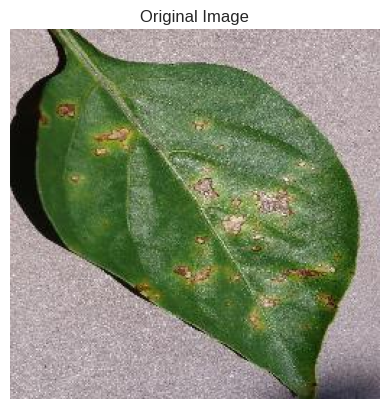

In [48]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___Bacterial_spot/969f1458-b7a9-4880-9759-05b0005c978e___JR_B.Spot 8978_180deg.JPG"

img = Image.open(image_path)
img_array = np.array(img)

print(f"Image loaded! Shape: {img_array.shape}")
print(f"Value range: [{img_array.min()} to {img_array.max()}]")

plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')
plt.show()

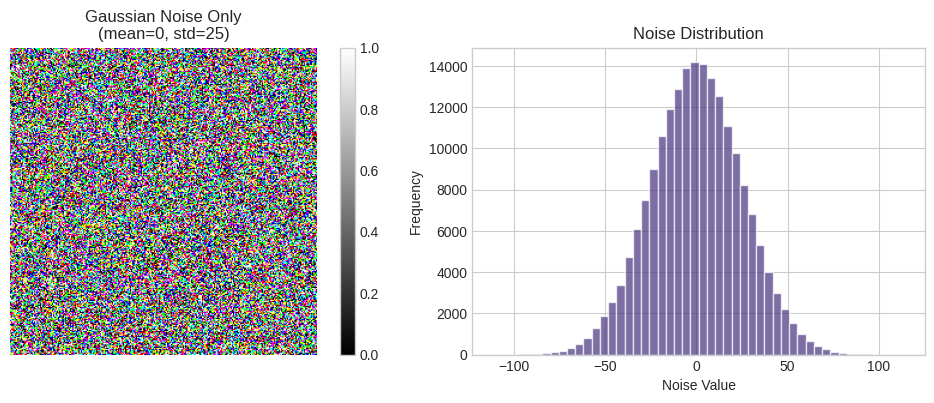

In [49]:

mean = 0
std_dev = 25

# Create pure Gaussian noise
noise_only = np.random.normal(mean, std_dev, img_array.shape).astype(np.float32)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(noise_only, cmap='gray')
plt.title(f"Gaussian Noise Only\n(mean={mean}, std={std_dev})")
plt.axis('off')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist(noise_only.flatten(), bins=50, alpha=0.7)
plt.title("Noise Distribution")
plt.xlabel("Noise Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig('gaussian_noise_itself.png', bbox_inches='tight')
plt.show()

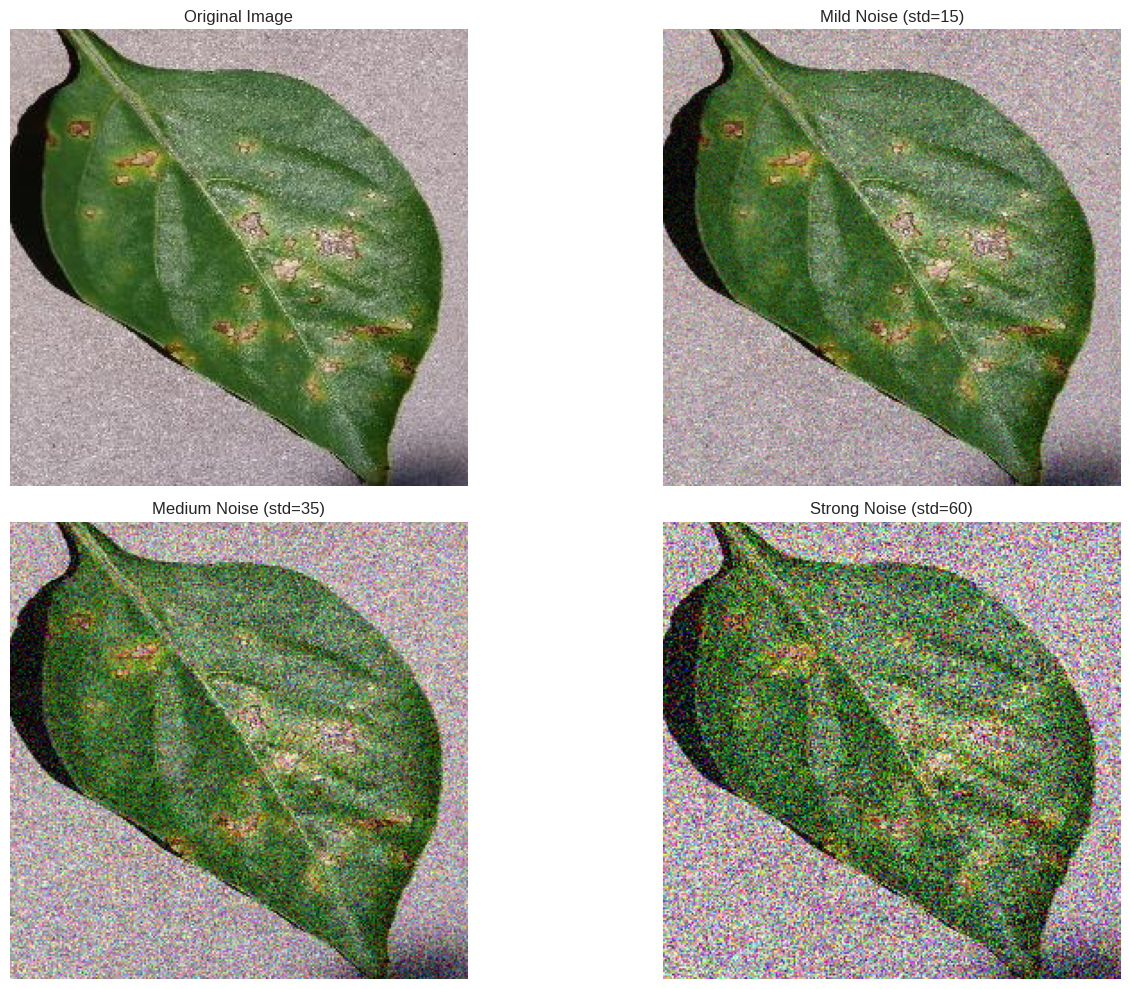

In [50]:
def add_gaussian_noise(image, mean=0, std_dev=25):
    # Convert to float to handle negative values
    image_float = image.astype(np.float32)

    # Generate Gaussian noise
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32)

    # Add noise to image
    noisy_image = image_float + noise

    # Clip to valid range [0, 255] and convert back to uint8
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8), noise

# Add noise with different intensities
noisy_image_1, noise_1 = add_gaussian_noise(img_array, std_dev=15)  # Mild noise
noisy_image_2, noise_2 = add_gaussian_noise(img_array, std_dev=35)  # Strong noise
noisy_image_3, noise_3 = add_gaussian_noise(img_array, std_dev=60)  # Very strong noise

# Show results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image_1)
plt.title("Mild Noise (std=15)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(noisy_image_2)
plt.title("Medium Noise (std=35)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(noisy_image_3)
plt.title("Strong Noise (std=60)")
plt.axis('off')

plt.tight_layout()
plt.savefig('noise_intensity_comparison.png', bbox_inches='tight')
plt.show()

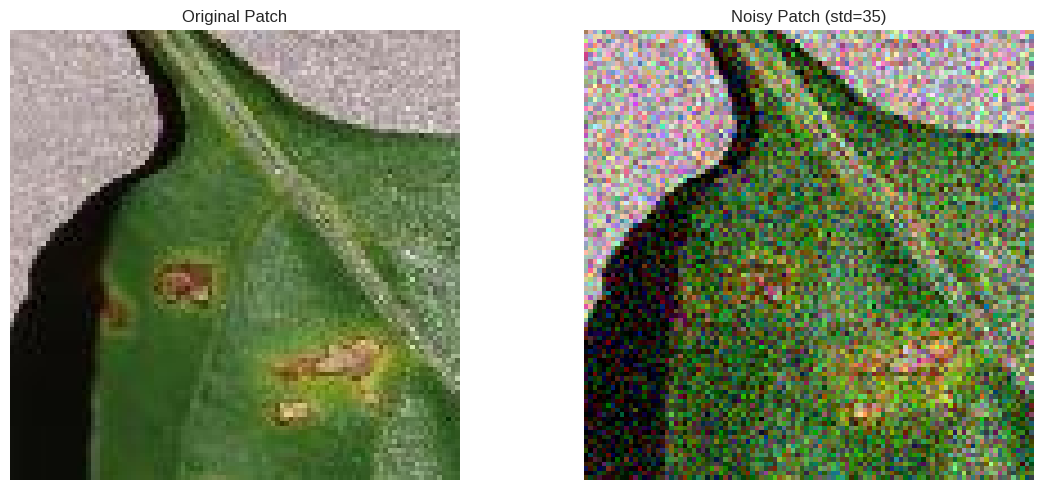

In [51]:
patch_size = 100
patch = img_array[:patch_size, :patch_size]
noisy_patch = noisy_image_2[:patch_size, :patch_size]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(patch)
plt.title("Original Patch")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_patch)
plt.title("Noisy Patch (std=35)")
plt.axis('off')

plt.tight_layout()
plt.savefig('patch_comparison.png', bbox_inches='tight')
plt.show()

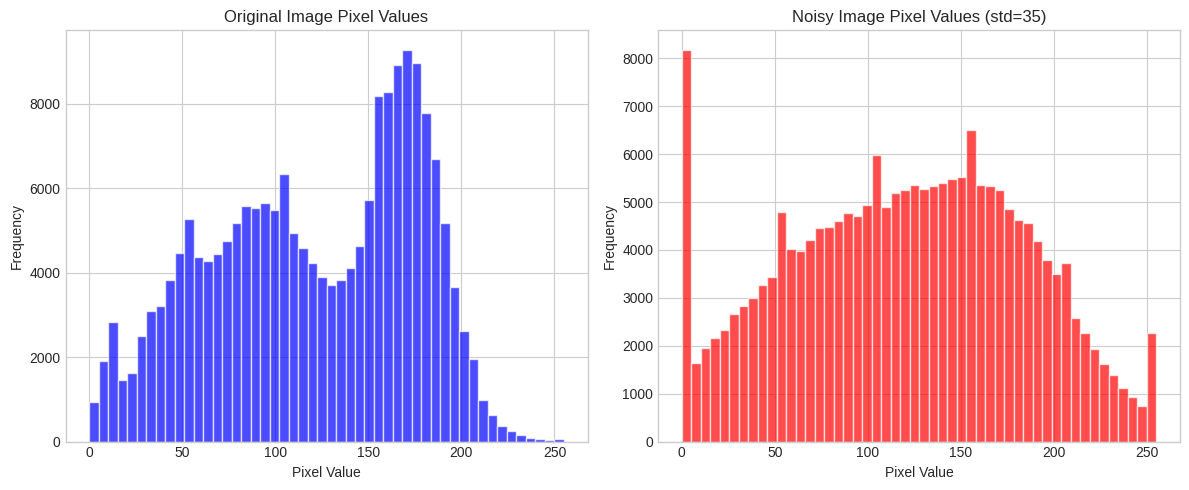

In [52]:
plt.figure(figsize=(12, 5))

# Original image histogram
plt.subplot(1, 2, 1)
plt.hist(img_array.flatten(), bins=50, alpha=0.7, color='blue', range=(0, 255))
plt.title("Original Image Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Noisy image histogram
plt.subplot(1, 2, 2)
plt.hist(noisy_image_2.flatten(), bins=50, alpha=0.7, color='red', range=(0, 255))
plt.title("Noisy Image Pixel Values (std=35)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig('pixel_distribution_comparison.png', bbox_inches='tight')
plt.show()